
# Effect vs. Resistance

The results are visualized in two plots. The functions `plot_effect_vs_resistance` and `plot_Z`. First the necessary libraries are imported. The functions are shown below. In the plots, the numerical calculations and end results are shown. At the bottom of this page you can find a calculation example.

```{note}
The calculations serve as examples for educational purposes and not as guidance for practice.
```

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

## Effect vs Resistance plotting function

In [2]:
def plot_effect_vs_resistance(meanE, sdE, gamma_E, meanR, sdR, gamma_R):
    # define lower and upper values of Effect E and Resistance R
    Elower = 0.5*meanE
    Eupper = 1.5*meanE
    E = np.arange(Elower, Eupper, 1)
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Plot x-axis range with 1 steps
    x_axis = np.arange(-50, 450, 1)

    # figure size in inches
    plt.figure(figsize=(10, 6))

    # Calculating statistics
    probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
    probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
    plt.text(Eupper, probE - 0.0015, "$\mu_E=$" + '{0:.0f}'.format(meanE), fontsize=10)
    plt.text(Eupper, probE - 0.003, "$\sigma_E=$" + '{0:.2f}'.format(sdE), fontsize=10)
    plt.text(Eupper, probE - 0.0045, "$\gamma_E=$" + '{0:.2f}'.format(gamma_E), fontsize=10)
    Ed = (meanE + 1.64 * sdE) * gamma_E

    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
    plt.text(Rupper, probR - 0.0015, "$\mu_R=$" + '{0:.0f}'.format(meanR), fontsize=10)
    plt.text(Rupper, probR - 0.003, "$\sigma_R=$" + '{0:.2f}'.format(sdR), fontsize=10)
    plt.text(Rupper, probR - 0.0045, "$\gamma_R=$" + '{0:.2f}'.format(gamma_R), fontsize=10)
    Rd = (meanR - 1.64 * sdR) / gamma_R

    # plot Ed values
    plt.text(Rupper * 1.1, 0.5 * probR - 0.0075, "$E_d = E_{char}*\gamma_E=$" + '{0:.0f}'.format(Ed), fontsize=10)
    plt.text(Rupper * 1.1, 0.5 * probR - 0.0090, "$R_d = R_{char}/\gamma_R=$" + '{0:.0f}'.format(Rd), fontsize=10)
    plt.text(Rupper * 1.1, 0.5 * probR - 0.0105, "u.c. = $E_d / R_d = $" + '{0:.2f}'.format(Ed / Rd), fontsize=10)

    # plot normal distribution curves for E (blue) and R (red)
    plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE), 'b')
    plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')

    plt.text(meanE + 5, probE, 'E', fontsize=15)
    plt.text(meanE + 1.64 * sdE, probErep, "$E_{char}=$" + '{0:.0f}'.format(meanE + 1.64 * sdE), fontsize=10)
    plt.text(meanE + 2.8 * sdE * gamma_E, probErep * 0.7, '$E_d$', fontsize=10)


    # plot 5%-characteristic value with dashed red/blue lines
    plt.plot([meanR - 1.64 * sdR, meanR - 1.64 * sdR], [0, probRrep], 'r--')
    plt.plot([meanE + 1.64 * sdE, meanE + 1.64 * sdE], [0, probErep], 'b--')

    # plot dimensioning value with drawn red/blue lines
    plt.plot([(meanR - 1.64 * sdR) / gamma_R, (meanR - 1.64 * sdR) / gamma_R], [0, 0.7 * probErep], 'r-')
    plt.plot([(meanE + 1.64 * sdE) * gamma_E, (meanE + 1.64 * sdE) * gamma_E], [0, 0.7 * probErep], 'b-')

    plt.text(meanR + 5, probR, 'R', fontsize=15)
    plt.text(meanR - 3.7 * sdR, probRrep, "$R_{char}=$" + '{0:.0f}'.format(meanR - 1.64 * sdR), fontsize=10)
    plt.text(meanR - 4.5 * sdR / gamma_R, probErep * 0.7, '$R_{d}$', fontsize=10)

    plt.xlabel("Effect (E, left) vs. Resistance (R, right) [unit could be e.g. load in kN or stress in MPa]")
    plt.ylabel("Probability")

    plt.savefig("E_R_curves_highgamma_uc0.81_beta6_8.pdf", format="pdf", bbox_inches="tight")
    plt.show()

## Reliability Z function

In [3]:
def plot_Z(meanE, sdE, gamma_E, meanR, sdR, gamma_R):
    # define lower and upper values of Effect E and Resistance R
    Elower = 0.5*meanE
    Eupper = 1.5*meanE
    E = np.arange(Elower, Eupper, 1)
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Plot x-axis range with 1 steps
    x_axis = np.arange(-50, 450, 1)

    # figure size in inches
    plt.figure(figsize=(10, 6))

    # Calculating statistics
    probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
    probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
    Ed = (meanE + 1.64 * sdE) * gamma_E

    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
    Rd = (meanR - 1.64 * sdR) / gamma_R
    
    # calculation reliability function
    meanZ = meanR-meanE
    sdZ=math.sqrt(sdE**2+sdR**2)
    probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
    beta=meanZ/sdZ

    # plot Ed values
    plt.text(Rupper * 1.1, 0.5 * probR - 0.0105, "u.c. = $E_d / R_d = $" + '{0:.2f}'.format(Ed / Rd), fontsize=10)

    # plot normal distribution curves for E (blue) and R (red)
    plt.plot(x_axis, norm.pdf(x_axis, meanE, sdE), 'b')
    plt.plot(x_axis, norm.pdf(x_axis, meanR, sdR), 'r')
    plt.plot(x_axis, norm.pdf(x_axis, meanZ, sdZ), 'g')


    # plot averages with dash-dotted red/blue lines
    plt.plot([meanR, meanR], [0, probR], 'r-.')
    plt.plot([meanE, meanE], [0, probE], 'b-.')
    plt.plot([meanZ,meanZ],[0,probZ], 'g-.')
    
    plt.text(meanE + 5, probE, 'E', fontsize=15)
    plt.text(meanR + 5, probR, 'R', fontsize=15)
    plt.text(meanZ-10, probZ+0.001, 'Z=R-E', fontsize=15)

    # arrows for beta
    plt.plot([0,0],[0,probZ], 'k-.')
    plt.plot([0,meanZ],[0.75*probZ,0.75*probZ], 'k-')
    plt.plot([0,15],[0.75*probZ,0.80*probZ], 'k-')
    plt.plot([0,15],[0.75*probZ,0.70*probZ], 'k-')
    plt.plot([meanZ,meanZ-15],[0.75*probZ,0.80*probZ], 'k-')
    plt.plot([meanZ,meanZ-15],[0.75*probZ,0.70*probZ], 'k-')
    plt.text(meanZ/2, 0.8*probZ, "$\\mu_Z = \\beta \\cdot \\sigma_Z $", fontsize=10)
    plt.text(meanR*1.25, 0.8*probZ, "$\\mu_Z = \\mu_R - \mu_E $", fontsize=10)
    plt.text(meanR*1.25, 0.60*probZ, "$\\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} $", fontsize=10)
    plt.text(meanR*1.25, 0.40*probZ, "$\\beta = \\mu_Z / \\sigma_Z = $"+'{0:.1f}'.format(beta), fontsize=10, fontweight='bold')


    plt.xlabel("Effect (E, left) vs. Resistance (R, right) [unit could be e.g. load in kN or stress in MPa]")
    plt.ylabel("Probability")

    plt.savefig("E_R_curves_highgamma_uc0.81_beta6.8.pdf", format="pdf", bbox_inches="tight")
    plt.show()


## Initializing examples with data

Using the functions defined above, plots can be generated. To do so, we need numerical input values. The numerical values for the example plot above are defined below and the functions executed.

In [4]:
meanE = 70
sdE = 23.52
gamma_E = 1.5

meanR = 270
sdR = 17.75
gamma_R = 1.2

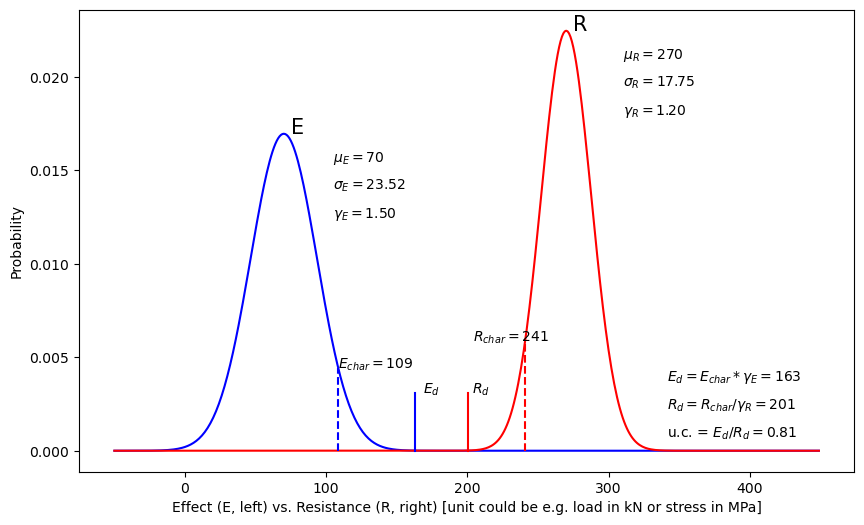

In [5]:
plot_effect_vs_resistance(meanE, sdE, gamma_E, meanR, sdR, gamma_R)

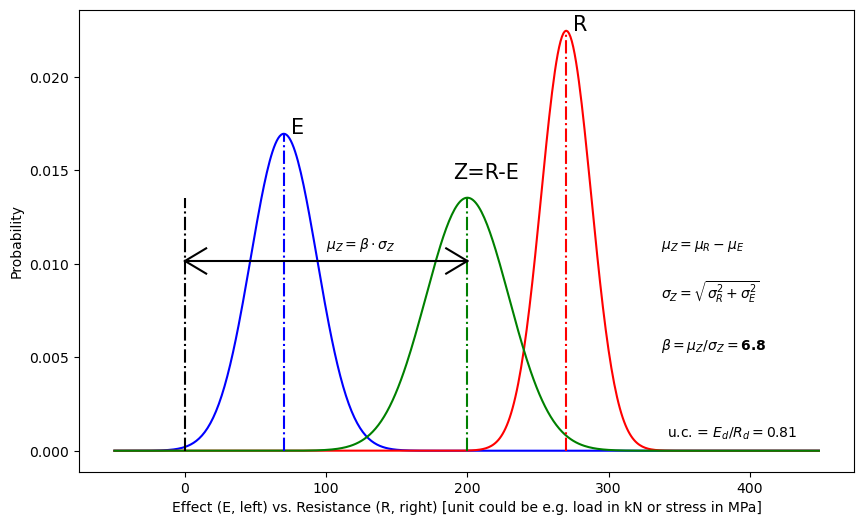

In [6]:
plot_Z(meanE, sdE, gamma_E, meanR, sdR, gamma_R)

```{card}
**Exercise**

If $\mu_E = 100$, $\sigma_E = 20$, $\mu_R = 240$ and $\sigma_R = 20$,
what are $\mu_Z$, $\sigma_Z$ and $\beta$?
Use $\gamma_E = 1.5$ and $\gamma_R = 1.2$.

You might want to download some code cells or the full .ipynb page and put code in there to perform the calculations and plot the graphs.

```{Admonition} Solution
:class: dropdown, tip
$\mu_Z = \mu_R - \mu_E = 140$  
$\sigma_Z = \sqrt{\sigma_R^2 + \sigma_E^2} = 22.4$  
$\beta = \frac{\mu_Z}{\sigma_Z} = 6.3$
```
```

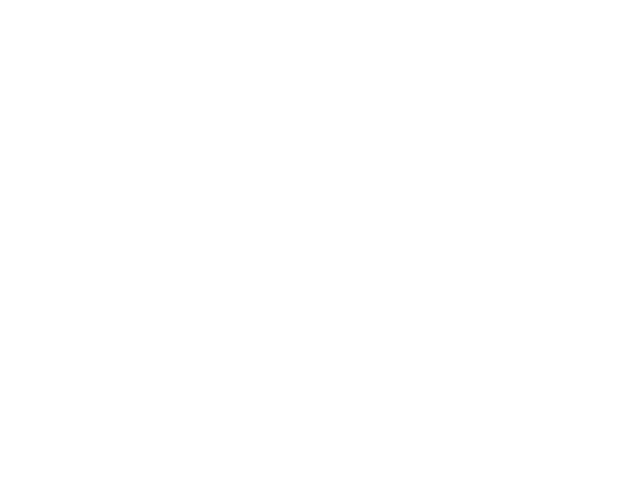

In [39]:
%matplotlib widget

import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
import math

plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

In [40]:
## Colors
grey = '#eeeeee' # light grey fill

### Prepare all the graphs that are to be plotted
#### Define the range of densities to plot
range_elements = np.arange(0, 10, 1)
n_element = np.max(range_elements)

### Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

meanE = 70
sdE = 23.52
gamma_E = 1.5

Elower = 0.5*meanE
Eupper = 1.5*meanE
E = np.arange(Elower, Eupper, 1)

probE = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdE ** 2))
probErep = (1 / (sdE * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdE) ** 2) / (2 * sdE ** 2))
Ed = (meanE + 1.64 * sdE) * gamma_E
E_norm = norm.pdf(x_axis, meanE, sdE)

sdR = 17.75
gamma_R = 1.2
R_possibilities = np.arange(250, 350, 10)

# x-axis range with 1 steps
x_axis = np.arange(-50, 450, 1)

## Add traces, one for each slider step
for i in range_elements: 
    
    ###
    meanR = R_possibilities[i]
    Rlower = 0.85*meanR
    Rupper = 1.15*meanR
    R = np.arange(Rlower, Rupper, 1)

    # Calculating statistics
    probR = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp(-((0) ** 2) / (2 * sdR ** 2))
    probRrep = (1 / (sdR * math.sqrt(2 * math.pi))) * math.exp((-(1.64 * sdR) ** 2) / (2 * sdR ** 2))
    Rd = (meanR - 1.64 * sdR) / gamma_R   
    R_norm = norm.pdf(x_axis, meanR, sdR)

    # calculation reliability function
    meanZ = meanR-meanE
    sdZ=math.sqrt(sdE**2+sdR**2)
    probZ=(1/(sdZ*math.sqrt(2*math.pi)))*math.exp(-((0)**2)/(2*sdZ**2))
    Z_norm = norm.pdf(x_axis, meanZ, sdZ)
    beta=meanZ/sdZ

    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=R_norm,
            line=dict(color='#0000CC'),
            mode='lines',
            name=f'R = {meanR:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=E_norm,
            line=dict(color='#CC0000'),
            mode='lines',
            name=f'E = {meanE:.2f}'))
    
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_axis,
            y=Z_norm,
            line=dict(color='#00CC00'),
            mode='lines',
            name=f'Z = {meanZ:.2f}'))

traces_per_step = 3 # Number of traces per value of i

## Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 3
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

## Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(R_possibilities[i]))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Resistance R = "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(range=[x_axis[0], x_axis[-1]])
fig.update_yaxes(title_text='Probability', range=[-0.001, 0.03])

fig.update_layout(
    title="Safety plot",
    sliders=sliders,
    legend_title="Legend"
)

fig